In [6]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
Data = pd.read_csv(r"C:\Users\longv\Prediction-House-Price\Data\raw data\dataNumerical.csv")


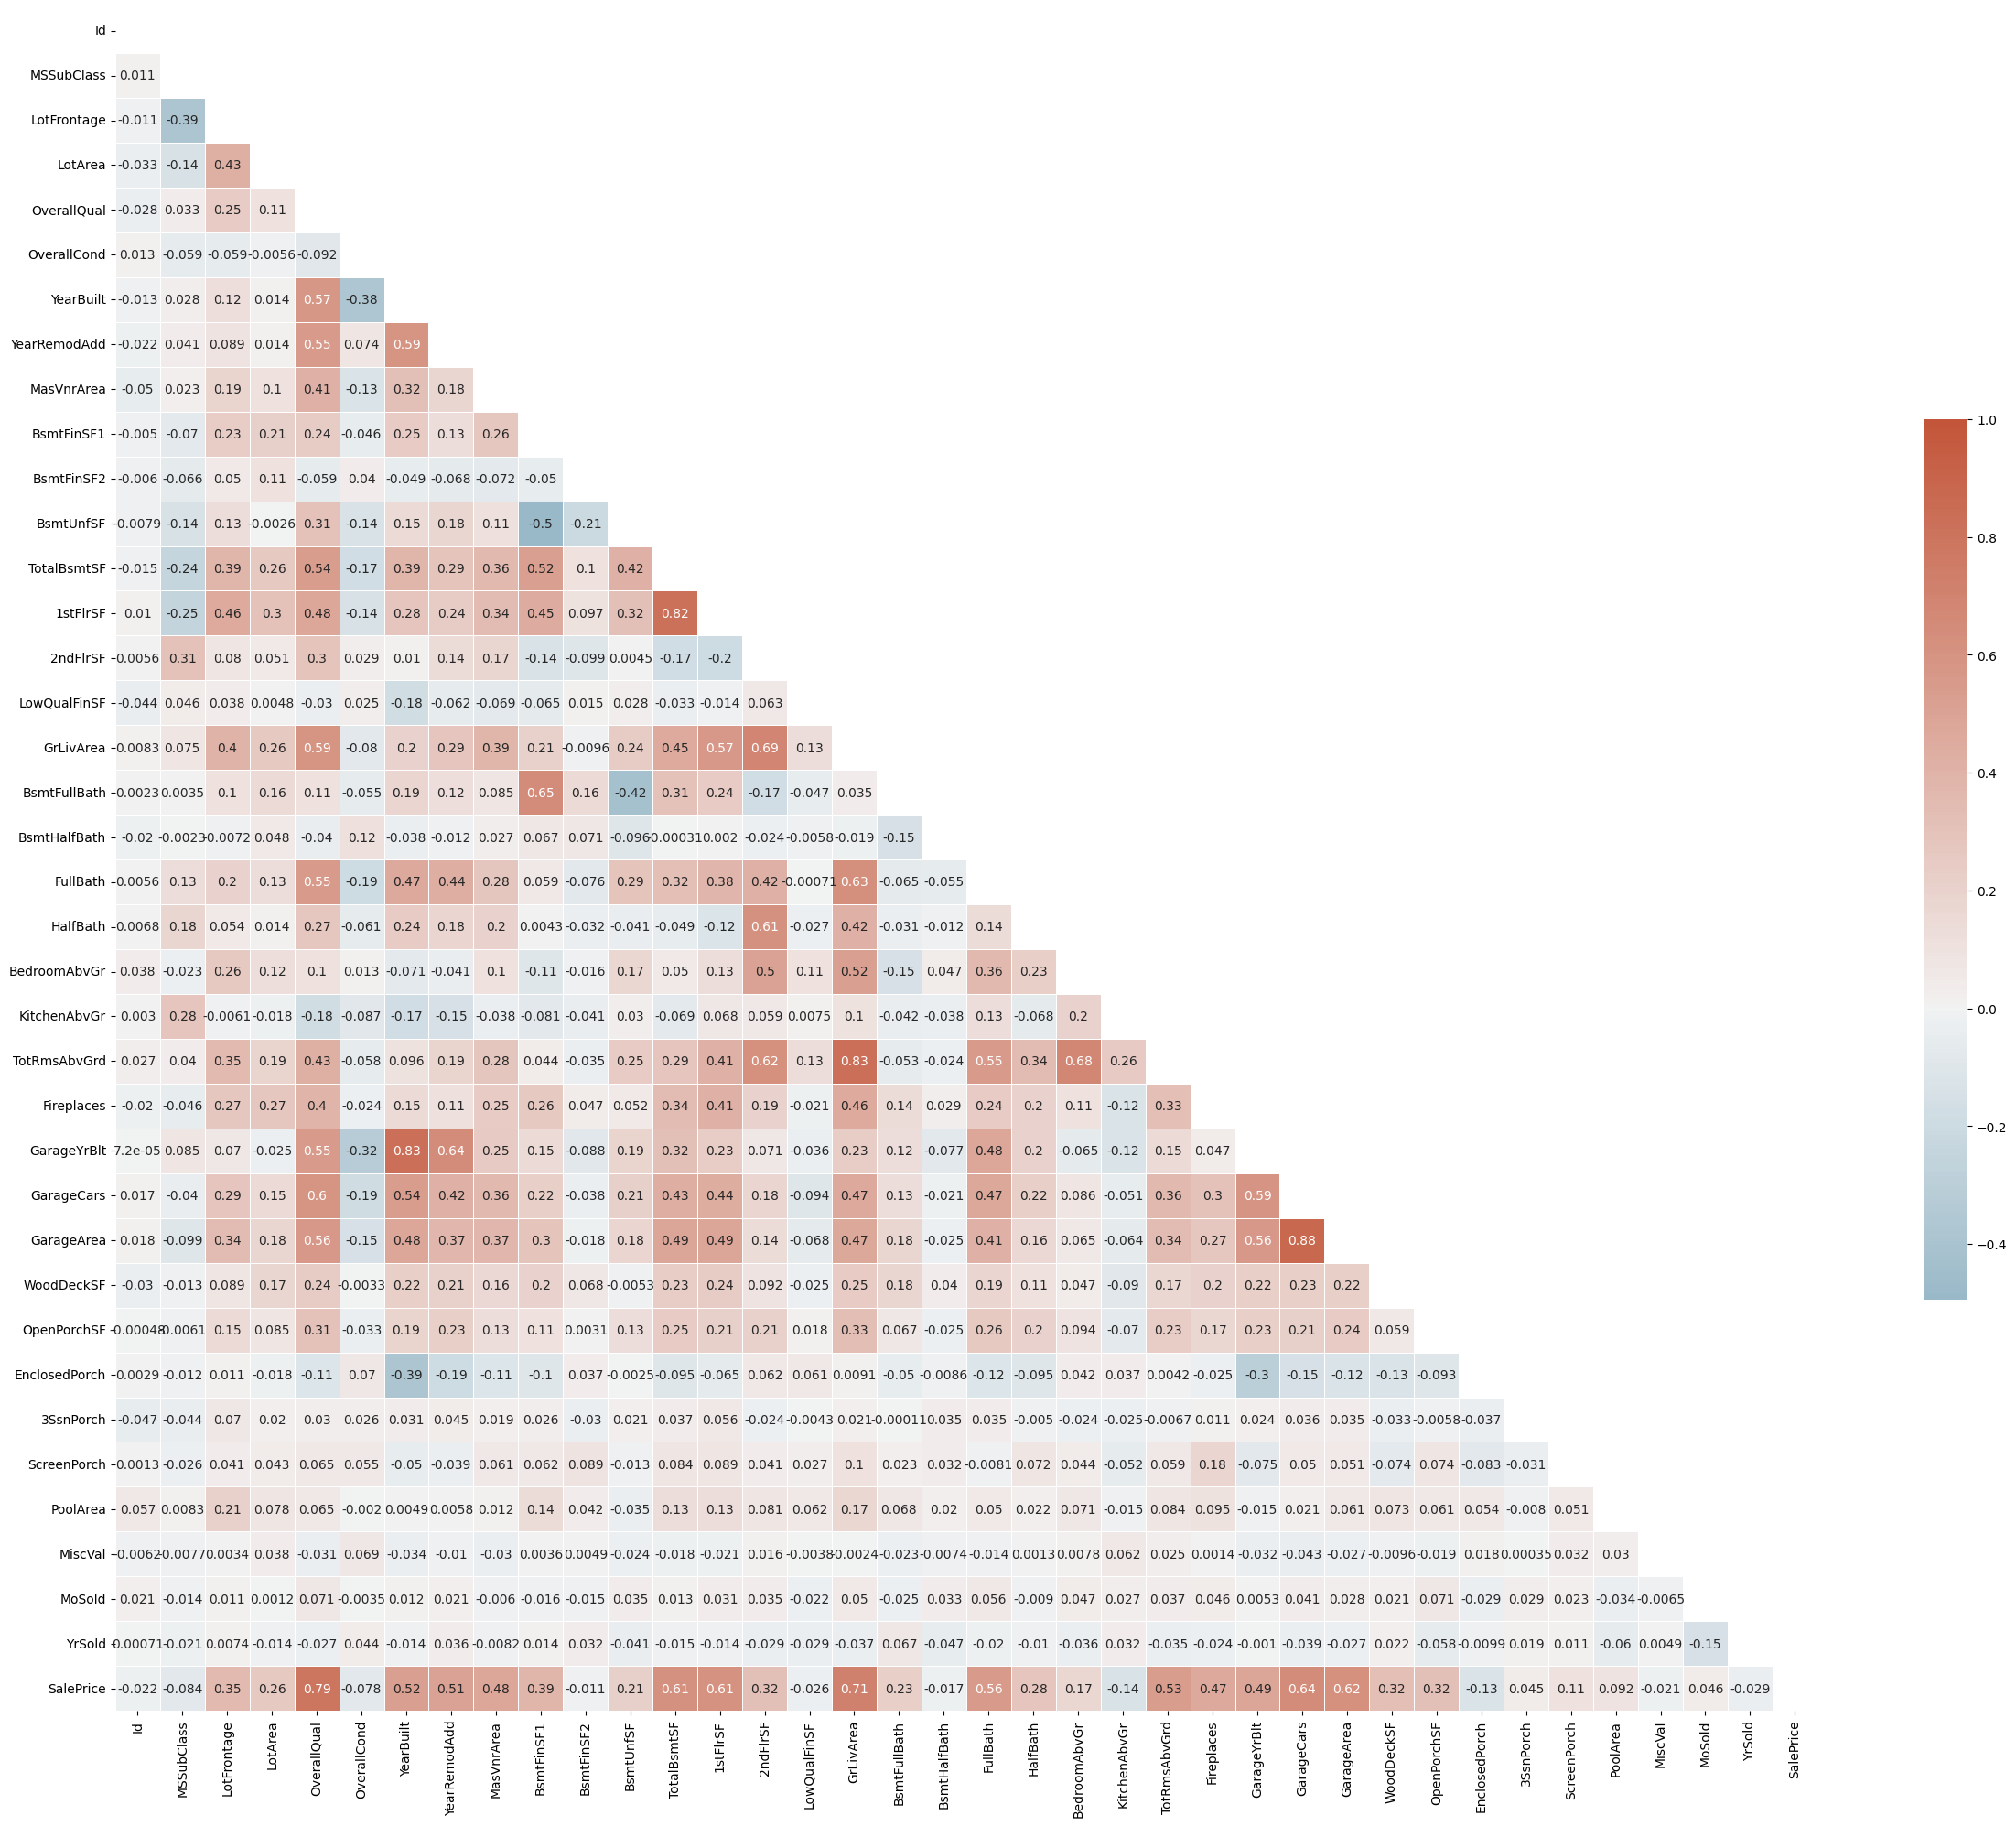

In [16]:
f, ax = plt.subplots(figsize=(30, 25))
mat = Data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# look at the SalePrice row, there are some feature have strong relation
# with SalePrice: features that have darker color
Data Processing
- Deal with Null
- Normalization



In [18]:
target = Data['SalePrice']
data = Data.drop(['SalePrice'], axis = 1) #data x_train x_test

In [30]:
#looking % NaN in data
nan = pd.DataFrame(data.isna().sum(), columns = ['sumNaN'])
nan['Percentage'] = (nan['sumNaN']/len(data))*100
nan = nan.sort_values(by = ['Percentage'])
nan


,sumNaN,Percentage
Id,0,0.000000
HalfBath,0,0.000000
BedroomAbvGr,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000
FullBath,0,0.000000
GarageArea,0,0.000000
OpenPorchSF,0,0.000000


In [34]:
#drop nan filed

In [35]:

target_log = np.log1p(target)

In [36]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, data, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [25]:
# 10 Fold Cross validation
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

In [37]:
from sklearn.linear_model import LinearRegression, BayesianRidge
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

In [42]:
lreg.fit(data, target_log)

LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error
rmse(lreg.predict(data), target_log)

0.14494147052179676